## Imports

In [1]:
## This file is modified to work with the newer, Cross-Validated models

import pickle
import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

model_dir = "F:/Thesis/modelsCV/"
metrics_dir = "F:/Thesis/modelsCV/metrics/"

def model_format(h,e,l,i):
    return(model_dir+"CV-"+str(h)+"-"+str(e)+"-"+str(l)+"-"+str(i)+".pickle")
def metrics_format(h,e,l,i):
    return(metrics_dir+"CV-metrics-"+str(h)+"-"+str(e)+"-"+str(l)+"-"+str(i)+".pickle")

def datasize_model_format(h,e,l,datasize,i):
    return(model_dir+"CV-"+str(h)+"-"+str(e)+"-"+str(l)+"-"+str(datasize)+"-"+str(i)+".pickle")
def datasize_metrics_format(h,e,l,datasize,i):
    return(metrics_dir+"CV-metrics-"+str(h)+"-"+str(e)+"-"+str(l)+"-"+str(datasize)+"-"+str(i)+".pickle")

In [2]:
def get_fs_as(h,e,l,i,datasize=''):
    # gets the data from a model with the given hyperparameters
    a_s = []
    f_s = []
    if datasize == '' or datasize == 'all':
        try:
            pickle_in = open(metrics_format(h,e,l,i),"rb")
            tmp = pickle.load(pickle_in)

            if len(tmp) == 2:
                [f_s,a_s] = tmp
            else:
                f_s = tmp
        except (FileNotFoundError,EOFError) as e:
            print("File error: ",e)
    else:
        try:
            pickle_in = open(datasize_metrics_format(h,e,l,datasize,i),"rb")
            tmp = pickle.load(pickle_in)

            if len(tmp) == 2:
                [f_s,a_s] = tmp
            else:
                f_s = tmp
        except (FileNotFoundError,EOFError) as e:
            print("File error: ",e)
        
    return([f_s, a_s])

def show_CV(lstoflsts,name,h,e,l,plot=False):
    # analyzes/graphs the model with given hyperparameters
    maxes = []
    ends = []
    for [lst,lbl] in lstoflsts:
        if len(lst) != 0:
            maxes.append(max(lst))
            ends.append(lst[-1])
            if plot:
                plt.plot(lst, label=lbl)
    print(f"Best {name} was {round(max(maxes),3)}")
    print(f"On average, {name} ended in {round(np.mean(ends),3)}")
    print(f"On average, {name} of the saved model was {round(np.mean(maxes),3)}")
    if plot:
        plt.ylabel(name)
        plt.xlabel('Epoch')
        plt.title(f"{name} for H:{h}, E:{e}, L:{l}")
        previous = plt.ylim()
        plt.ylim(0,1)
        #plt.ylim(previous[0],1)
        #plt.ylim(0.75,0.95)
        plt.legend()
        plt.show()

def analyze_CV(h,e,l,fa='both'):
    # passes variables & control show_cv()
    prev_fs = []
    prev_as = []
    print("### H: ",h," E: ",e, "L: ",l)
    for i in range(5):
        [f_s,a_s] = get_fs_as(h,e,l,i)
        prev_as.append([a_s,str(i)])
        prev_fs.append([f_s,str(i)])
    if fa == "f" or fa == "both":
        show_CV(prev_fs,"f-score",h,e,l)
    if fa == "a" or fa == "both":
        show_CV(prev_as,"accuracy",h,e,l)
          

In [3]:
def compare_average_endresults(lstoflsts,title,variablename,yname='f-score',savename='',log=False,legend=True,add=''):
    # Creates a summarizing graph for a list of cross-validated models
    # The value for each model is taken as the average of the endresults
    for [model_lst,lbl] in lstoflsts:
        listforthislbl = []
        variablesforthislbl = []
        for [modellsts,variable_value] in model_lst:
            maxes = []
            for CV_scores in modellsts:
                maxes.append(max(CV_scores))
            listforthislbl.append(np.mean(maxes))
            variablesforthislbl.append(variable_value)
        plt.plot(variablesforthislbl, listforthislbl,label=lbl)
    if add != '':
        for [[vals,variables],lbl] in add:
            plt.plot(variables, vals,label=lbl)
            
        
    plt.ylabel(yname)
    plt.xlabel(variablename)
    plt.title(title)
    #previous = plt.ylim()
    #plt.ylim(0,1)
    #plt.ylim(previous[0],1)
    #plt.ylim(0.83,0.92)
    if legend:
        plt.legend()   
    if log:
        plt.xscale('log')
    if savename != '':
        plt.savefig('images/'+savename)
    plt.show() 

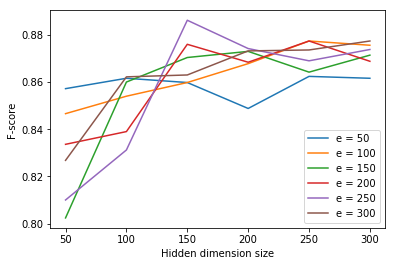

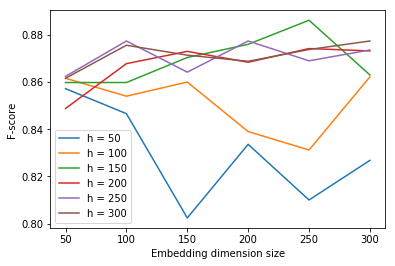

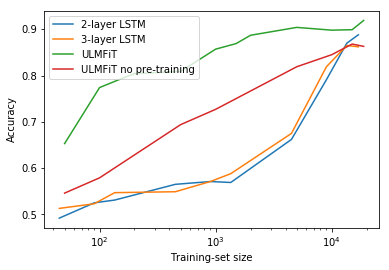

In [7]:
#compare single
if False:
    l = 3
    e = 150
    h = 300
    to_check = [[[h,e,l],f'{h}-{e}-{l}']]
    show_graphs(to_check,title=f'H: {h}, E: {e}, L:  {l}')
        
#compare layer amount
if False:
    to_check = [[[200,50,1],1],[[200,50,3],3],[[200,50,4],4]]
    show_graphs(to_check,title=f'H: {200}, E: {50}, L:  variable')

    to_check = [[[200,100,1],1],[[200,100,3],3],[[200,100,4],4]]
    show_graphs(to_check,title=f'H: {200}, E: {150}, L:  variable')
    
    to_check = [[[200,150,1],1],[[200,150,3],3],[[200,150,4],4]]
    show_graphs(to_check,title=f'H: {200}, E: {200}, L:  variable')

#compare hidden amount
if True:
    layers = 3
    total_list = []
    for embedding in [50,100,150,200,250,300]:
        all_hidden = []
        for hidden in [50,100,150,200,250,300]:
            listofCV = []
            for i in range(5):
                [f_s,a_s] = get_fs_as(hidden,embedding,layers,i)
                listofCV.append(f_s)
            
            all_hidden.append([listofCV,hidden])
        total_list.append([all_hidden,f'e = {embedding}'])
        # compare_multiple_show_all(to_check,title=f'H: variable, E: {embedding}, L:  {layers}' )
    compare_average_endresults(total_list,title='',variablename='Hidden dimension size',yname='F-score',savename='hiddeninfluence.pdf')
        

#compare embedding amount
if True:
    layers = 3
    total_list = []
    for hidden in [50,100,150,200,250,300]:
        all_embedding = []
        for embedding in [50,100,150,200,250,300]:
            listofCV = []
            for i in range(5):
                [f_s,a_s] = get_fs_as(hidden,embedding,layers,i)
                listofCV.append(f_s)
            
            all_embedding.append([listofCV,embedding])
        total_list.append([all_embedding,f'h = {hidden}'])
    compare_average_endresults(total_list,title='',variablename='Embedding dimension size',yname='F-score',savename='embeddinginfluence.pdf')
    
#compare dataset size
ulmfitresults = [[0.653,0.774,0.792,0.804,0.809,0.857,0.869,0.887,0.904,0.898,0.899,0.919],\
                [50,100,150,200,500,1000,1500,2000,5000,10000,15000,18836]]

ulmfitnopreresults = [[0.546,0.579,0.694,0.727,0.819,0.845,0.868,0.863],\
                [50,100,500,1000,5000,10000,15000,18836]]

datasizes = [50,100,150,500,1000,1500,5000,10000,15000,'all']

three_layer = [0.513, 0.523, 0.547, 0.549, 0.571, 0.588, 0.675, 0.819, 0.865, 0.862]
two_layer = [0.492, 0.525, 0.531, 0.565, 0.571, 0.569, 0.662, 0.791, 0.87, 0.888]
splitpercentage = 0.9
real_datasizes = [splitpercentage*elem if type(elem) == int else elem for elem in datasizes]
real_datasizes[-1] = splitpercentage*18836

three_layer = [three_layer,real_datasizes]
two_layer = [two_layer,real_datasizes]


add_ulmfit = [[two_layer,'2-layer LSTM'],[three_layer,'3-layer LSTM'],[ulmfitresults,'ULMFiT'],[ulmfitnopreresults,'ULMFiT no pre-training']]
if True:
    splitpercentage = 0.9
    completelist = []
    h = 300
    e = 300
    layers = 2
    datasizes = [50,100,150,500,1000,1500,5000,10000,15000,'all']
    real_datasizes = [splitpercentage*elem if type(elem) == int else elem for elem in datasizes]
    datalist = []
    j = 0
    for size in datasizes:
        listofCV = []
        for i in range(5):
            [f_s,a_s] = get_fs_as(h,e,layers,i,datasize = size)
            listofCV.append(a_s)
        size = real_datasizes[j]
        if size == 'all':
            size = splitpercentage*18836
        datalist.append([listofCV,size])
        j += 1
    # completelist.append([datalist,'LSTM baseline 2-layer'])    
    
    h = 300
    e = 300
    layers = 3
    datasizes = [50,100,150,500,1000,1500,5000,10000,15000,'all']
    real_datasizes = [splitpercentage*elem if type(elem) == int else elem for elem in datasizes]
    datalist = []
    j = 0
    for size in datasizes:
        listofCV = []
        for i in range(5):
            [f_s,a_s] = get_fs_as(h,e,layers,i,datasize = size)
            listofCV.append(a_s)
        size = real_datasizes[j]
        if size == 'all':
            size = splitpercentage*18836
        datalist.append([listofCV,size])
        j += 1
    # completelist.append([datalist,'LSTM baseline 3-layer'])  
    
        
    compare_average_endresults(completelist,title='',variablename='Training-set size',yname='Accuracy',savename='datasetsizes.pdf',log=True,add=add_ulmfit)

In [5]:
# [50,100,150,200,250,300,350]

hidden_dims = [250,300]
embedding_dims = [250,300]
layer_amounts = [1]

for h in hidden_dims:
    for e in embedding_dims:
        for l in layer_amounts:
            try:
                analyze_CV(h,e,l,'f')
            except ValueError:
                pass

### H:  250  E:  250 L:  1
Best f-score was 0.872
On average, f-score ended in 0.83
On average, f-score of the saved model was 0.85
### H:  250  E:  300 L:  1
Best f-score was 0.867
On average, f-score ended in 0.838
On average, f-score of the saved model was 0.847
### H:  300  E:  250 L:  1
Best f-score was 0.876
On average, f-score ended in 0.821
On average, f-score of the saved model was 0.849
### H:  300  E:  300 L:  1
Best f-score was 0.872
On average, f-score ended in 0.839
On average, f-score of the saved model was 0.85


In [6]:
datasizes = [1,2,3,'test']
[0.9*elem if type(elem) == int else 3 for elem in datasizes]

[0.9, 1.8, 2.7, 3]